In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digits = load_digits()

In [3]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [4]:
dir(load_digits)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__']

In [5]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

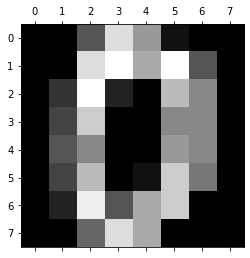

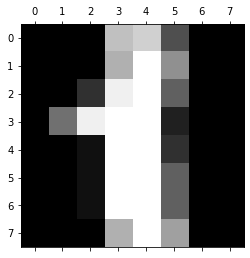

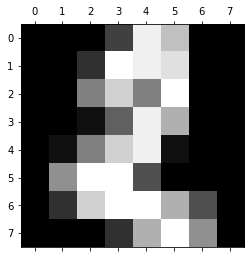

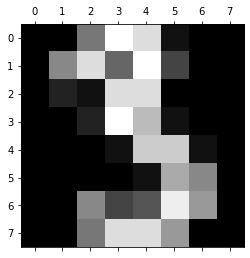

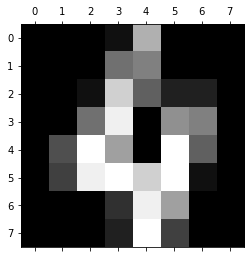

In [8]:
plt.gray()
[plt.matshow(digits.images[i]) for i in range(5)]

In [9]:
digits.target[:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(digits.data,digits.target,test_size=0.6)

In [16]:
X_train

array([[ 0.,  0.,  0., ..., 12.,  0.,  0.],
       [ 0.,  0.,  1., ...,  7.,  0.,  0.],
       [ 0.,  1.,  9., ...,  1.,  0.,  0.],
       ...,
       [ 0.,  0.,  7., ...,  5.,  0.,  0.],
       [ 0.,  0.,  3., ..., 12.,  0.,  0.],
       [ 0.,  1.,  9., ...,  8.,  0.,  0.]])

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')

In [22]:
model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
model.score(X_test,Y_test)*100

94.62465245597775

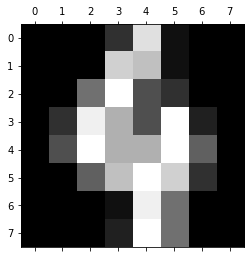

In [28]:
import numpy as np
randomNumber = np.random.randint(100)
plt.matshow(digits.images[randomNumber])

In [30]:
digits.target[randomNumber] 

4

In [37]:
op = model.predict(digits.data[[randomNumber]])

In [39]:
print(op[0])

4


In [40]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix

In [47]:
confusion_mat = confusion_matrix(Y_test,y_pred)
confusion_mat

array([[105,   0,   0,   0,   1,   1,   0,   0,   0,   0],
       [  0, 105,   4,   1,   0,   0,   0,   0,   1,   1],
       [  0,   2,  97,   0,   0,   0,   0,   0,   1,   0],
       [  0,   0,   1, 104,   0,   0,   0,   0,   4,   0],
       [  0,   4,   0,   0, 107,   0,   0,   1,   1,   3],
       [  0,   1,   0,   0,   0, 108,   0,   0,   0,   7],
       [  0,   1,   0,   0,   1,   1, 109,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 101,   1,   1],
       [  0,  13,   0,   1,   0,   0,   0,   0,  91,   0],
       [  0,   0,   0,   1,   0,   0,   0,   0,   3,  94]], dtype=int64)

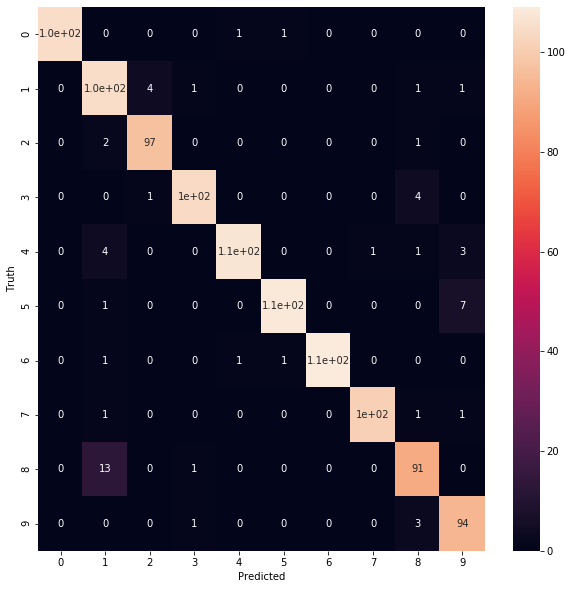

In [50]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_mat,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()